# Data Wrangling and Exploratory Data Analysis

## Pick a dataset
Starting off exploring two datasets to figure out which will be best to use. 

The 'rio' dataset is large and ideal in size, however, it was created by scraping craigsllist website monthly for two years, therefore it has many duplicate values. After considering how large the dataset is after dropping those duplicates, we'll reconsider which to model off of.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
argentina = pd.read_csv('data/argentina.csv')

In [3]:
rio = pd.read_csv('data/rio_de_janeiro.csv')

/Users/cathleenpena1/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,17,19,20,28,33,34,54,62,63,66,68,69,88) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
display(argentina.head(3))
display(rio.head(3))

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,wdQ5hWhv8P14T7Sh9g4QCg==,Propiedad,2020-12-25,9999-12-31,2020-12-25,-32.716652,-68.642692,Argentina,Mendoza,NaN,...,NaN,350.0,350.0,NaN,NaN,NaN,Excelentes Lotes Sobre Ruta 34,Corredor Responsable: VICTOR E. MONTIVERO - C....,Lote,Venta
1,nnMBYZ4RMRY+vm753EtA+g==,Propiedad,2020-12-25,9999-12-31,2020-12-25,-24.797723,-65.467514,Argentina,Salta,NaN,...,NaN,1541.0,1541.0,NaN,NaN,Mensual,TERRENO + VENTA + JARDINES DE SAN LORENZO +150...,Corredor Responsable: Pablo Castañeda - C.U.C....,Lote,Venta
2,+dnVA1K6JxzL1zAjOEQ1pA==,Propiedad,2020-12-25,2020-12-29,2020-12-25,-34.919373,-58.020591,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,...,NaN,1000.0,1000.0,NaN,NaN,Mensual,Lote en Venta de 1000 m2 en La Plata,Corredor Responsable: Rico Sebastián - Martill...,Lote,Venta


,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,0.0,17878,https://www.airbnb.com/rooms/17878,2.018082e+13,2018-08-16,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,24480,https://www.airbnb.com/rooms/24480,2.018082e+13,2018-08-16,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,The studio is located at Vinicius de Moraes St...,My studio is located in the best of Ipanema. ...,none,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,25026,https://www.airbnb.com/rooms/25026,2.018082e+13,2018-08-16,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print('Number of unique listings: \t', rio.id.nunique())
print('Number of observations: \t', len(rio))

Number of unique listings: 	 73903
Number of observations: 	 784122


In [6]:
rio.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
rio = rio.drop_duplicates(subset='id')
len(rio)

73903

In [ ]:
rio.to_csv('data/rio.csv')

After downsizing the rio dataset, we went from 2.54 GB to 203 MB therefore, I've decided to go with the 'argentina' dataset.

## Argentina EDA

### Check for duplicates, null values,  and type conversion

In [3]:
argentina.id.nunique(), len(argentina)

(1000000, 1000000)

In [4]:
argentina.dtypes, len(argentina.columns)

(id                  object
 ad_type             object
 start_date          object
 end_date            object
 created_on          object
 lat                float64
 lon                float64
 l1                  object
 l2                  object
 l3                  object
 l4                  object
 l5                  object
 l6                 float64
 rooms              float64
 bedrooms           float64
 bathrooms          float64
 surface_total      float64
 surface_covered    float64
 price              float64
 currency            object
 price_period        object
 title               object
 description         object
 property_type       object
 operation_type      object
 dtype: object,
 25)

In [5]:
display(argentina.iloc[:,:12].head(3))
display(argentina.iloc[:,12:].head(3))

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,l5
0,wdQ5hWhv8P14T7Sh9g4QCg==,Propiedad,2020-12-25,9999-12-31,2020-12-25,-32.716652,-68.642692,Argentina,Mendoza,NaN,NaN,NaN
1,nnMBYZ4RMRY+vm753EtA+g==,Propiedad,2020-12-25,9999-12-31,2020-12-25,-24.797723,-65.467514,Argentina,Salta,NaN,NaN,NaN
2,+dnVA1K6JxzL1zAjOEQ1pA==,Propiedad,2020-12-25,2020-12-29,2020-12-25,-34.919373,-58.020591,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,La Plata,NaN


,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,NaN,NaN,NaN,NaN,350.0,350.0,NaN,NaN,NaN,Excelentes Lotes Sobre Ruta 34,Corredor Responsable: VICTOR E. MONTIVERO - C....,Lote,Venta
1,NaN,NaN,NaN,NaN,1541.0,1541.0,NaN,NaN,Mensual,TERRENO + VENTA + JARDINES DE SAN LORENZO +150...,Corredor Responsable: Pablo Castañeda - C.U.C....,Lote,Venta
2,NaN,NaN,NaN,NaN,1000.0,1000.0,NaN,NaN,Mensual,Lote en Venta de 1000 m2 en La Plata,Corredor Responsable: Rico Sebastián - Martill...,Lote,Venta


#### Type Conversion
Make created_on, start_date, and end_date into datetime

In [6]:
argentina['start_date'] = pd.to_datetime(argentina['start_date'])
argentina['created_on'] = pd.to_datetime(argentina['created_on'])

In [7]:
argentina['end_date'] = pd.to_datetime(argentina['end_date'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 9999-12-31 00:00:00

Ran into a problem with the dates being set to the year 9999 which is out of bound of the pandas to_datetime function.

Now we must deal with manually changing that date.

I will set it to the max year that the to_datetime allows you to set it to.

In [7]:
pd.to_datetime(argentina['end_date'], errors='coerce').sort_values(ascending=False).tail(100)

999600   NaT
999601   NaT
999606   NaT
999609   NaT
999614   NaT
          ..
999977   NaT
999982   NaT
999985   NaT
999986   NaT
999998   NaT
Name: end_date, Length: 100, dtype: datetime64[ns]

In [8]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

In [9]:
argentina[argentina['end_date'].str.contains('9999')]['end_date']

0         9999-12-31
1         9999-12-31
4         9999-12-31
5         9999-12-31
6         9999-12-31
             ...    
999977    9999-12-31
999982    9999-12-31
999985    9999-12-31
999986    9999-12-31
999998    9999-12-31
Name: end_date, Length: 216548, dtype: object

In [10]:
argentina['end_date'] = argentina['end_date'].str.replace('9999-12-31', '2262-04-11')

In [11]:
argentina['end_date'] = pd.to_datetime(argentina['end_date'])

In [12]:
argentina.dtypes

id                         object
ad_type                    object
start_date         datetime64[ns]
end_date           datetime64[ns]
created_on         datetime64[ns]
lat                       float64
lon                       float64
l1                         object
l2                         object
l3                         object
l4                         object
l5                         object
l6                        float64
rooms                     float64
bedrooms                  float64
bathrooms                 float64
surface_total             float64
surface_covered           float64
price                     float64
currency                   object
price_period               object
title                      object
description                object
property_type              object
operation_type             object
dtype: object

#### Dealing with nulls

In [13]:
perc_null = argentina.isnull().sum() / len(argentina) * 100
perc_null = perc_null.to_frame()
perc_null.columns = ['Percent Null']
perc_null

,Percent Null
id,0.0000
ad_type,0.0000
start_date,0.0000
end_date,0.0000
created_on,0.0000
lat,15.0811
lon,15.1745
l1,0.0000
l2,0.0000
l3,5.3327


#### Drop unnecessary columns
Drop Columns with 50% or more data missing and drop columns that do not have an associated price

In [14]:
argentina.dropna(subset=['price'], inplace=True)

In [15]:
argentina.drop(['l4', 'l5', 'l6'], axis=1, inplace=True)
print('Number of columns: \t', len(argentina.columns))

Number of columns: 	 22


Drop columns of strings that will not give us any valuable information

In [16]:
argentina.drop(['title', 'description'], axis=1, inplace=True)

### Impute missing values

In [17]:
argentina = argentina.fillna({'lat': argentina.lat.mean(), 
                              'lon': argentina.lon.mean(),  
                              'rooms': argentina.rooms.mean(), 
                              'bedrooms': argentina.bedrooms.mean(), 
                              'bathrooms': argentina.bathrooms.mean(), 
                              'surface_total': argentina.surface_total.mean(), 
                              'surface_covered': argentina.surface_covered.mean()
                             })


### Explore what kinds of values are used in the other string columns

In [18]:
argentina.ad_type.value_counts()

Propiedad    963098
Name: ad_type, dtype: int64

Since all of the rows contain the same value for 'ad_type', we will drop that column as well.

In [19]:
argentina.drop('ad_type', axis=1, inplace=True)

In [20]:
argentina.l1.value_counts()

Argentina         949344
Uruguay            12973
Estados Unidos       691
Brasil                90
Name: l1, dtype: int64

This can be one-hot encoded

In [21]:
argentina.l2.value_counts()

Capital Federal                 236394
Buenos Aires Costa Atlántica    173184
Bs.As. G.B.A. Zona Norte        135002
Bs.As. G.B.A. Zona Sur          121301
Santa Fe                         79210
Bs.As. G.B.A. Zona Oeste         73197
Córdoba                          64550
Buenos Aires Interior            21287
Neuquén                           9028
Mendoza                           7482
Maldonado                         6906
Misiones                          5003
Entre Ríos                        4495
Montevideo                        4313
Río Negro                         4193
Tucumán                           4138
Salta                             2889
San Luis                          1748
Colonia                           1101
Chaco                              966
La Pampa                           895
Corrientes                         838
San Juan                           792
Chubut                             786
Canelones                          515
Jujuy                    

In [22]:
argentina.l3.value_counts()

Mar del Plata            151696
Rosario                   59051
Tigre                     41433
La Plata                  37101
Palermo                   34382
                          ...  
Santa Clara (Mendoza)         1
Cañada Rosquín                1
Las Perlas                    1
Campo Largo                   1
Las Toscas                    1
Name: l3, Length: 1209, dtype: int64

In [23]:
argentina.currency.value_counts()

USD    757617
ARS    202179
UYU      1692
PEN       231
Name: currency, dtype: int64

In [24]:
argentina.price_period.value_counts()

Mensual    338986
Semanal        29
Diario          4
Name: price_period, dtype: int64

In [25]:
argentina.property_type.value_counts()

Departamento       360464
Otro               237032
Casa               179869
Lote                78850
PH                  34076
Local comercial     32159
Oficina             25045
Cochera              8037
Depósito             6085
Casa de campo        1481
Name: property_type, dtype: int64

### Translate to English

In [26]:
argentina['property_type'] = argentina['property_type'].replace({'Departamento':'Department',
                                                                 'Otro': 'Other', 
                                                                 'Casa': 'House', 
                                                                 'Lote': 'Lot', 
                                                                 'Local comercial': 'Shop', 
                                                                 'Oficina': 'Office', 
                                                                 'Cochera': 'Garage', 
                                                                 'Depósito': 'Warehouse', 
                                                                 'Casa de campo': 'Cottage'
                                                                })

In [27]:
argentina.operation_type.value_counts()

Venta                755922
Alquiler             177278
Alquiler temporal     29898
Name: operation_type, dtype: int64

Translate to english

In [28]:
argentina['operation_type'] = argentina['operation_type'].replace({'Venta':'For Sale',
                                                                 'Alquiler': 'For Rent', 
                                                                 'Alquiler temporal': 'For Sublease'
                                                                  })

In [29]:
argentina.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,963098.000000,963098.000000,963098.000000,963098.000000,963098.00000,963098.000000,9.630980e+05,9.630980e+05
mean,-34.816634,-59.193616,2.844661,2.084058,1.70148,474.884308,6.370155e+03,3.285948e+05
std,2.711359,2.366182,1.210602,1.489370,0.94590,2499.260252,2.188542e+06,1.192329e+07
min,-54.840886,-119.699390,1.000000,-16.000000,1.00000,-136.000000,-1.300000e+02,0.000000e+00
25%,-34.816634,-59.193616,2.844661,2.000000,1.00000,178.000000,1.200000e+02,4.200000e+04
50%,-34.649614,-58.498129,2.844661,2.084058,1.70148,474.884308,6.370155e+03,9.800000e+04
75%,-34.548750,-58.373499,3.000000,2.084058,2.00000,474.884308,6.370155e+03,2.100000e+05
max,85.051129,-1.981231,40.000000,900.000000,20.00000,200000.000000,2.147484e+09,1.000000e+10


In [30]:
argentina.l3.value_counts()

Mar del Plata            151696
Rosario                   59051
Tigre                     41433
La Plata                  37101
Palermo                   34382
                          ...  
Santa Clara (Mendoza)         1
Cañada Rosquín                1
Las Perlas                    1
Campo Largo                   1
Las Toscas                    1
Name: l3, Length: 1209, dtype: int64

### Find ways to impute values for l3, currency, price period
#### l3

In [31]:
missing_l3s = argentina[argentina.l3.isnull()][['l1','l2', 'l3']].drop_duplicates()
missing_l3s

,l1,l2,l3
40,Argentina,Córdoba,NaN
61,Argentina,Salta,NaN
101,Argentina,Neuquén,NaN
218,Argentina,Tucumán,NaN
353,Argentina,Bs.As. G.B.A. Zona Norte,NaN
545,Uruguay,Colonia,NaN
549,Uruguay,Canelones,NaN
550,Estados Unidos,Florida,NaN
551,Uruguay,Montevideo,NaN
774,Argentina,Río Negro,NaN


In [32]:
#argentina[argentina.l2 == 'Santa Cruz'].l3.mode()[0]
missing_l3s.values

array([['Argentina', 'Córdoba', nan],
       ['Argentina', 'Salta', nan],
       ['Argentina', 'Neuquén', nan],
       ['Argentina', 'Tucumán', nan],
       ['Argentina', 'Bs.As. G.B.A. Zona Norte', nan],
       ['Uruguay', 'Colonia', nan],
       ['Uruguay', 'Canelones', nan],
       ['Estados Unidos', 'Florida', nan],
       ['Uruguay', 'Montevideo', nan],
       ['Argentina', 'Río Negro', nan],
       ['Argentina', 'Capital Federal', nan],
       ['Argentina', 'Mendoza', nan],
       ['Uruguay', 'Maldonado', nan],
       ['Argentina', 'Bs.As. G.B.A. Zona Sur', nan],
       ['Argentina', 'Santa Fe', nan],
       ['Argentina', 'Bs.As. G.B.A. Zona Oeste', nan],
       ['Argentina', 'San Juan', nan],
       ['Estados Unidos', 'Miami', nan],
       ['Argentina', 'Misiones', nan],
       ['Argentina', 'Buenos Aires Costa Atlántica', nan],
       ['Argentina', 'San Luis', nan],
       ['Argentina', 'Tierra Del Fuego', nan],
       ['Argentina', 'Entre Ríos', nan],
       ['Uruguay', 'Rocha

In [33]:
import math
math.isnan(np.nan)
print(argentina[argentina.l2 == 'Córdoba'].l3.mode()[0])

Córdoba


In [35]:
for row in missing_l3s.values:
    l2 = row[1]
    row[2] = argentina[argentina.l2 == l2].l3.mode()[0]
    print(row)
#this gives me an error, have to handle edge cases now

['Argentina' 'Córdoba' 'Córdoba']
['Argentina' 'Salta' 'Salta']
['Argentina' 'Neuquén' 'Confluencia']
['Argentina' 'Tucumán' 'San Miguel de Tucumán']
['Argentina' 'Bs.As. G.B.A. Zona Norte' 'Tigre']
['Uruguay' 'Colonia' 'Carmelo']


KeyError: 0

In [34]:
missing_data = []
for row in missing_l3s.values:
    l2 = row[1]
    if l2 in ['New York', 'Rio Grande do Norte', 'Miami', 'Canelones']:
        row[2] = 'MISSING'
    else :
        row[2] = argentina[argentina.l2 == l2].l3.mode()[0]
    missing_data.append(row)
fixed_l3s = pd.DataFrame(missing_data, columns=['l1', 'l2', 'l3'])
fixed_l3s

,l1,l2,l3
0,Argentina,Córdoba,Córdoba
1,Argentina,Salta,Salta
2,Argentina,Neuquén,Confluencia
3,Argentina,Tucumán,San Miguel de Tucumán
4,Argentina,Bs.As. G.B.A. Zona Norte,Tigre
5,Uruguay,Colonia,Carmelo
6,Uruguay,Canelones,MISSING
7,Estados Unidos,Florida,Palm Beach
8,Uruguay,Montevideo,Pocitos
9,Argentina,Río Negro,San Carlos de Bariloche


In [35]:
missing_indices = missing_l3s.index
for index in missing_indices:
    l2val = argentina.loc[index, 'l2']
    argentina.at[index, 'l3'] = fixed_l3s[fixed_l3s.l2 == l2val].l3.values[0]
    
argentina.l3.isnull().sum()

51202

In [36]:
missing_indices

Int64Index([    40,     61,    101,    218,    353,    545,    549,    550,
               551,    774,    839,   1248,   1317,   3209,   3956,   6507,
              7522,   7639,   7683,   9792,  10545,  11896,  14001,  18451,
             22682,  26788,  29953,  30322,  36617,  48294,  49616,  58657,
             63145,  68178,  97950, 104646, 162436, 377563, 383288, 986418],
           dtype='int64')

Had to come up with another way because I was having a lot of trouble

In [37]:
argentina = argentina.sort_values(by=['lat', 'lon', 'l2'])
argentina['l3'] = argentina['l3'].fillna(method='ffill')
argentina.l3.isnull().sum()

0

#### Currency

In [38]:
argentina.currency.isnull().sum()

1379

In [39]:
argentina.currency.value_counts()

USD    757617
ARS    202179
UYU      1692
PEN       231
Name: currency, dtype: int64

In [40]:
argentina.groupby('currency')['price'].mean()

currency
ARS    733599.498301
PEN    685088.965368
USD    221682.568836
UYU     24722.229314
Name: price, dtype: float64

In [41]:
argentina.loc[argentina.price<80000, 'currency'].fillna('UYU', inplace=True)
argentina.currency.isnull().sum()

1379

In [42]:
argentina = argentina.sort_values(by=['price'])
argentina['currency'] = argentina['currency'].fillna(method='ffill')
argentina.currency.isnull().sum()

0

In [43]:
argentina[argentina.currency.isnull()]

,id,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,property_type,operation_type


In [44]:
#argentina['currency'] = argentina['currency'].fillna('ARS')
#argentina.currency.isnull().sum()

#### Price Period

In [45]:
argentina.price_period.value_counts()

Mensual    338986
Semanal        29
Diario          4
Name: price_period, dtype: int64

In [46]:
argentina = argentina.fillna({'price_period': 'Mensual'})
argentina.price_period.isnull().sum()

0

In [47]:
argentina['price_period'] = argentina['price_period'].replace({'Mensual':'Monthly', 'Semanal': 'Weekly', 'Diario': 'Daily'})
argentina.price_period.value_counts()

Monthly    963065
Weekly         29
Daily           4
Name: price_period, dtype: int64

In [48]:
argentina.isnull().sum()

id                 0
start_date         0
end_date           0
created_on         0
lat                0
lon                0
l1                 0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
currency           0
price_period       0
property_type      0
operation_type     0
dtype: int64

#### DONE!

### Get all currencies to be the same
Convert all prices to USD

- 1 ARS = 0.010 USD
- 1 UYU = 0.023 USD
- 1 PEN = 0.250 USD

In [49]:
argentina.currency.value_counts()

USD    758703
ARS    202472
UYU      1692
PEN       231
Name: currency, dtype: int64

In [50]:
argentina[argentina['currency'] == 'ARS']['price']

113228    0.000000e+00
186213    0.000000e+00
614675    0.000000e+00
452469    0.000000e+00
178912    0.000000e+00
              ...     
601175    1.530399e+09
959536    1.550000e+09
808722    1.655097e+09
959535    2.500000e+09
306053    3.100000e+09
Name: price, Length: 202472, dtype: float64

In [51]:
argentina['price'] = argentina['price'].replace({0:np.nan})

In [52]:
argentina[argentina['currency'] == 'ARS']['price']

113228             NaN
186213             NaN
614675             NaN
452469             NaN
178912             NaN
              ...     
601175    1.530399e+09
959536    1.550000e+09
808722    1.655097e+09
959535    2.500000e+09
306053    3.100000e+09
Name: price, Length: 202472, dtype: float64

In [53]:
argentina.loc[argentina['currency'] == 'ARS', 'price'] = argentina[argentina['currency'] == 'ARS']['price'] * 0.010
argentina.loc[argentina['currency'] == 'UYU', 'price'] = argentina[argentina['currency'] == 'ARS']['price'] * 0.023
argentina.loc[argentina['currency'] == 'PEN', 'price'] = argentina[argentina['currency'] == 'ARS']['price'] * 0.250


In [54]:
argentina[argentina['currency'] == 'ARS']['price']

113228            NaN
186213            NaN
614675            NaN
452469            NaN
178912            NaN
             ...     
601175    15303992.06
959536    15500000.00
808722    16550974.00
959535    25000000.00
306053    31000000.00
Name: price, Length: 202472, dtype: float64

In [55]:
argentina.drop('currency', axis=1, inplace=True)

Replace all '0' price values with the mean.

In [56]:
argentina.price.mean()

176556.30118611775

In [57]:
argentina['price'] = argentina['price'].fillna(argentina.price.mean())

In [58]:
argentina.isnull().sum()

id                 0
start_date         0
end_date           0
created_on         0
lat                0
lon                0
l1                 0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
price_period       0
property_type      0
operation_type     0
dtype: int64

### Visualizations

In [59]:
argentina.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,963098.000000,963098.000000,963098.000000,963098.000000,963098.00000,963098.000000,9.630980e+05,9.630980e+05
mean,-34.816634,-59.193616,2.844661,2.084058,1.70148,474.884308,6.370155e+03,1.765563e+05
std,2.711359,2.366182,1.210602,1.489370,0.94590,2499.260252,2.188542e+06,1.019807e+07
min,-54.840886,-119.699390,1.000000,-16.000000,1.00000,-136.000000,-1.300000e+02,1.000000e-02
25%,-34.816634,-59.193616,2.844661,2.000000,1.00000,178.000000,1.200000e+02,1.900000e+04
50%,-34.649614,-58.498129,2.844661,2.084058,1.70148,474.884308,6.370155e+03,8.800000e+04
75%,-34.548750,-58.373499,3.000000,2.084058,2.00000,474.884308,6.370155e+03,1.800000e+05
max,85.051129,-1.981231,40.000000,900.000000,20.00000,200000.000000,2.147484e+09,1.000000e+10


In [60]:
argentina.corr()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.404253,0.014776,0.008766,-0.005824,0.001471,-0.000142,-0.000822
lon,-0.404253,1.000000,-0.020388,-0.001817,0.012290,-0.029275,-0.000021,0.001776
rooms,0.014776,-0.020388,1.000000,0.391731,0.409070,0.023812,-0.000065,0.007193
bedrooms,0.008766,-0.001817,0.391731,1.000000,0.288601,0.016281,0.000527,0.004655
bathrooms,-0.005824,0.012290,0.409070,0.288601,1.000000,0.030925,0.000275,0.010208
surface_total,0.001471,-0.029275,0.023812,0.016281,0.030925,1.000000,0.000179,0.002600
surface_covered,-0.000142,-0.000021,-0.000065,0.000527,0.000275,0.000179,1.000000,-0.000007
price,-0.000822,0.001776,0.007193,0.004655,0.010208,0.002600,-0.000007,1.000000


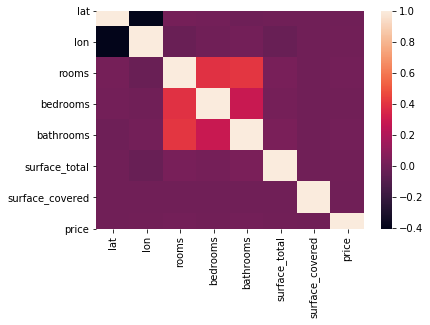

In [61]:
sns.heatmap(argentina.corr())

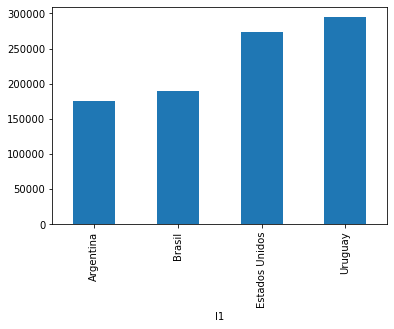

In [62]:
prices_by_country = argentina.groupby('l1')['price'].mean()
prices_by_country.plot(kind='bar')

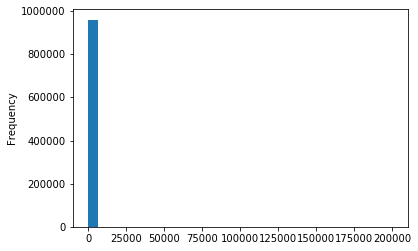

In [63]:
argentina['surface_total'].plot(kind='hist', bins=30)

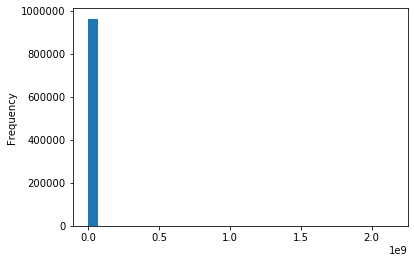

In [64]:
argentina['surface_covered'].plot(kind='hist', bins=30)

this is strange

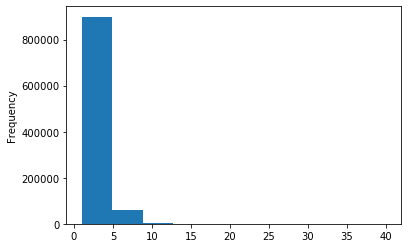

In [65]:
argentina['rooms'].plot(kind='hist')

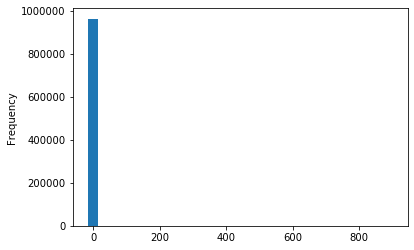

In [66]:
argentina['bedrooms'].plot(kind='hist', bins=30)

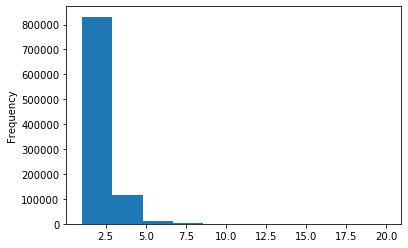

In [67]:
argentina['bathrooms'].plot(kind='hist')

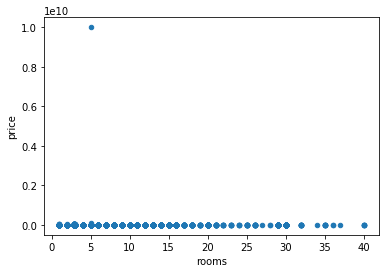

In [68]:
argentina.plot(kind='scatter', x='rooms', y='price')

In [69]:
argentina.price.mean()

176556.30118611813

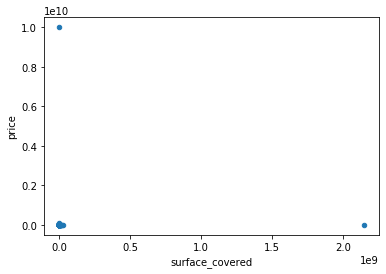

In [70]:
argentina.plot(kind='scatter', x='surface_covered', y='price')

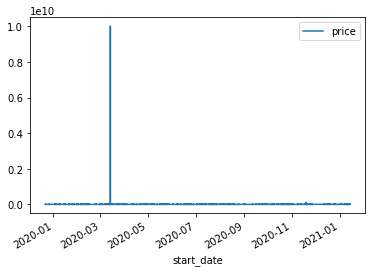

In [71]:
argentina.plot(kind='line', x='start_date', y='price')

In [72]:
argentina.start_date.min(), argentina.start_date.max()

(Timestamp('2019-12-22 00:00:00'), Timestamp('2021-01-14 00:00:00'))

In [73]:
argentina.end_date.min(), argentina.end_date.max()

(Timestamp('2019-12-22 00:00:00'), Timestamp('2262-04-11 00:00:00'))

In [74]:
argentina.created_on.min(), argentina.created_on.max()

(Timestamp('2019-12-22 00:00:00'), Timestamp('2021-01-14 00:00:00'))

### Drop ID since it adds no information

In [75]:
argentina.id.nunique(), len(argentina)

(963098, 963098)

In [76]:
argentina.drop('id', axis=1, inplace=True)

In [77]:
argentina.columns, len(argentina.columns)

(Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
        'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
        'price', 'price_period', 'property_type', 'operation_type'],
       dtype='object'),
 17)

In [78]:
argentina.reset_index(drop=True, inplace=True)

In [79]:
argentina.head(3)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,price_period,property_type,operation_type
0,2020-06-17,2020-06-18,2020-06-17,-34.995340,-58.047423,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.844661,0.0,1.70148,474.884308,6370.15545,176556.301186,Monthly,Department,For Sale
1,2020-05-20,2020-05-20,2020-05-20,-34.816634,-59.193616,Argentina,Neuquén,Neuquén,5.000000,2.0,1.00000,72.000000,72.00000,176556.301186,Monthly,Department,For Sale
2,2020-07-14,2020-08-13,2020-07-14,-31.116769,-64.482921,Argentina,Córdoba,Valle Hermoso,2.844661,3.0,1.00000,747.000000,244.00000,176556.301186,Monthly,House,For Sale


In [80]:
argentina.to_csv('data/argentina_cleaned.csv')

In [81]:
argentina.dtypes

start_date         datetime64[ns]
end_date           datetime64[ns]
created_on         datetime64[ns]
lat                       float64
lon                       float64
l1                         object
l2                         object
l3                         object
rooms                     float64
bedrooms                  float64
bathrooms                 float64
surface_total             float64
surface_covered           float64
price                     float64
price_period               object
property_type              object
operation_type             object
dtype: object